In [106]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_circles, make_s_curve, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.metrics import silhouette_samples
import matplotlib.cm

# k-Means Clustering

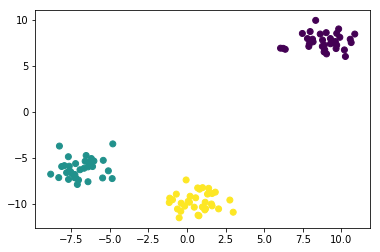

In [94]:
#clusters playing the role of 'labels', despite that we don't know them
attributes, clusters = make_blobs(centers = 3, cluster_std = 1)
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

<function matplotlib.pyplot.show>

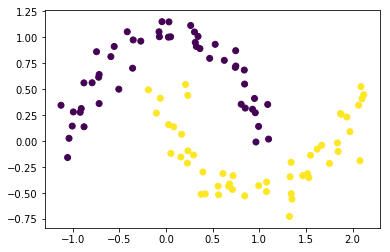

In [37]:
attributes, clusters = make_moons(noise = 0.1)
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

<function matplotlib.pyplot.show>

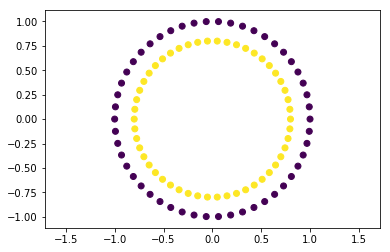

In [38]:
attributes, clusters = make_circles()
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

<function matplotlib.pyplot.show>

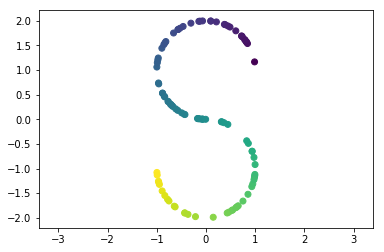

In [43]:
attributes, clusters = make_s_curve()
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(attributes[:, 0], attributes[:, 2], c = clusters) 
# [:, 2] because I want to see [x, z], not [x, y]
plt.show()

# How KMeans works

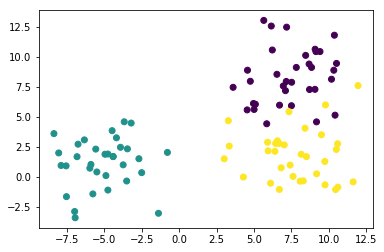

In [63]:
attributes, clusters = make_blobs(centers = 3, cluster_std = 2)
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

In [64]:
k_means = KMeans(3, init = "random")
predicted = k_means.fit_predict(attributes)
predicted

array([0, 0, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0,
       0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0,
       0, 2, 1, 1, 1, 0, 1, 1])

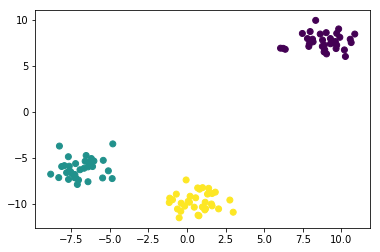

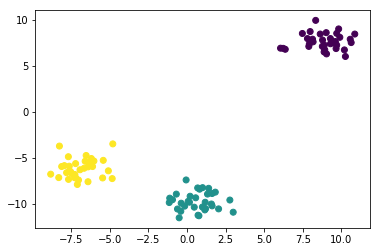

array([[ 3.76418418, -2.33927339],
       [-8.01116965, -7.67326375],
       [ 0.32673206,  5.9300274 ]])

In [96]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

plt.scatter(attributes[:, 0], attributes[:, 1], c = predicted)
#plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker = "x")
plt.show()

k_means.cluster_centers_

## Silhouette Plots -> to evaluate clustering quality

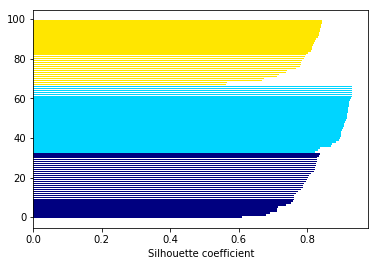

In [97]:
km = KMeans(3) # Also, 2 and 4
predicted = km.fit_predict(attributes)
silhouette_vals = silhouette_samples(attributes, predicted)
y_min, y_max = 0, 0
y_ticks = []
cluster_labels = np.unique(clusters)
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[predicted == c] 
    c_silhouette_vals.sort()
    y_max += len(c_silhouette_vals)
    color = matplotlib.cm.jet(i / cluster_labels.shape[0]) 
    plt.barh(range(y_min, y_max), c_silhouette_vals, color = color)
    y_min += len(c_silhouette_vals)
plt.xlabel("Silhouette coefficient")

### Here KMeans doesn't work fine with moons:

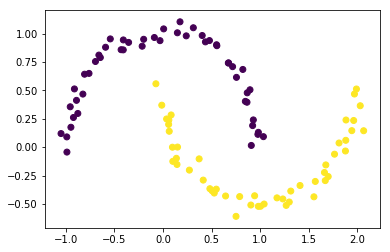

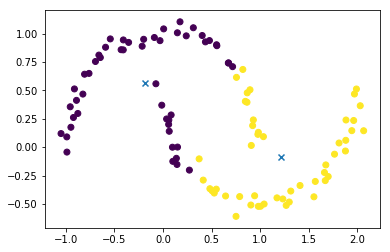

In [74]:
attributes, clusters = make_moons(noise = 0.05)
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

k_means = KMeans(2, init = "random")
predicted = k_means.fit_predict(attributes)

plt.scatter(attributes[:, 0], attributes[:, 1], c = predicted)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker = "x")
plt.show()

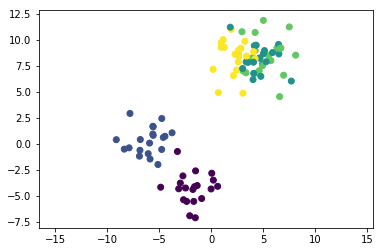

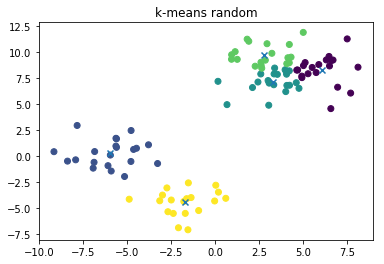

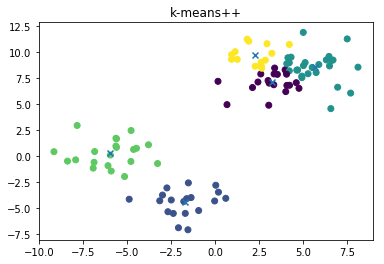

In [88]:
attributes, clusters = make_blobs(cluster_std = 1.5, centers = 5)
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()
    
k_means = KMeans(5, init = "random")
predicted = k_means.fit_predict(attributes)
plt.scatter(attributes[:, 0], attributes[:, 1], c = predicted)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker = "x")
plt.title("k-means random")
plt.show()

k_means = KMeans(5, init = "k-means++")
predicted = k_means.fit_predict(attributes)
plt.scatter(attributes[:, 0], attributes[:, 1], c = predicted)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker = "x")
plt.title("k-means++")
plt.show()

# Hierarchical Clustering

In [100]:
aggl = AgglomerativeClustering(n_clusters = 3, linkage = "complete")
aggl_predicted = aggl.fit_predict(attributes)
aggl_predicted

array([0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2,
       1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2,
       2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1,
       0, 2, 1, 2, 1, 1, 1, 0], dtype=int64)

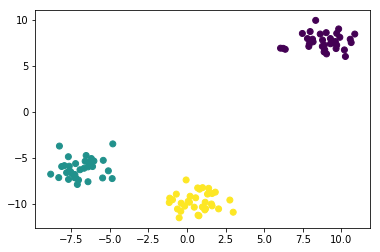

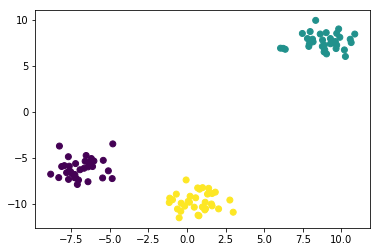

In [101]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()
plt.scatter(attributes[:, 0], attributes[:, 1], c = aggl_predicted)
plt.show()


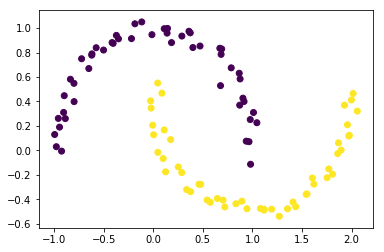

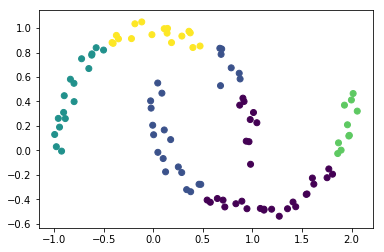

In [109]:
attribute_moons, cluster_moons = make_moons(noise = 0.05)
aggl_moons = AgglomerativeClustering(n_clusters = 5, linkage = "complete")
predicted_moons = aggl_moons.fit_predict(attribute_moons)
plt.scatter(attribute_moons[:, 0], attribute_moons[:, 1], c = cluster_moons)
plt.show()
plt.scatter(attribute_moons[:, 0], attribute_moons[:, 1], c = predicted_moons)
plt.show()

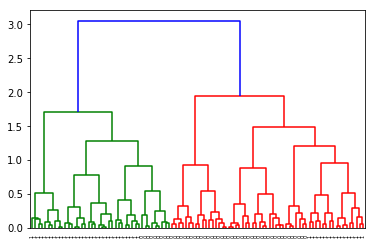

In [110]:
row_clusters = linkage(attribute_moons, method = "complete", metric = "euclidean")
row_dendr = dendrogram(row_clusters, labels = cluster_moons)

In [ ]:
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

clustering_names = [
    'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
    'SpectralClustering', 'Ward', 'AgglomerativeClustering',
    'DBSCAN', 'Birch']

plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

datasets = [noisy_circles, noisy_moons, blobs, no_structure]
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # create clustering estimators
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward',
                                           connectivity=connectivity)
    spectral = cluster.SpectralClustering(n_clusters=2,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=.2)
    affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                       preference=-200)

    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=2,
        connectivity=connectivity)

    birch = cluster.Birch(n_clusters=2)
    clustering_algorithms = [
        two_means, affinity_propagation, ms, spectral, ward, average_linkage,
        dbscan, birch]

    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()